In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [45]:
ds_co = pd.read_csv('CSV/GaCo01_01.csv')
ds_pt = pd.read_csv('CSV/GaPt03_01.csv')


In [46]:
ds_co.head()
ds_co.iloc[:,1:-2]

,VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8
0,199.10,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53
1,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53
2,199.10,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.90,77.55,112.42,48.07,13.75,105.49,144.98,79.53
3,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,77.55,112.42,50.82,13.75,105.49,144.98,79.53
4,199.10,87.34,91.08,24.09,19.03,87.67,89.10,62.59,163.90,77.55,112.42,50.82,13.75,102.74,144.98,79.53
5,199.10,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.90,77.55,112.42,48.07,13.75,102.74,142.12,79.53
6,199.10,87.34,93.50,24.09,19.03,87.67,89.10,64.57,163.90,77.55,112.42,50.82,13.75,105.49,144.98,79.53
7,199.10,87.34,93.50,24.09,21.12,87.67,89.10,62.59,163.90,77.55,112.42,48.07,13.75,102.74,144.98,79.53
8,199.10,87.34,93.50,24.09,21.12,87.67,89.10,64.57,163.90,77.55,112.42,50.82,13.75,102.74,142.12,79.53
9,199.10,87.34,93.50,24.09,21.12,85.47,89.10,64.57,163.90,77.55,112.42,48.07,13.75,102.74,142.12,79.53


In [47]:
poly = PolynomialFeatures(degree=2)
ds_co_poly = poly.fit_transform(ds_co)
ds_co_poly

array([[  1.00000000e+00,   1.00000000e-02,   1.99100000e+02, ...,
          4.38508840e+05,   4.95325600e+05,   5.59504000e+05],
       [  1.00000000e+00,   2.00000000e-02,   1.99100000e+02, ...,
          4.35890448e+05,   4.93844560e+05,   5.59504000e+05],
       [  1.00000000e+00,   3.00000000e-02,   1.99100000e+02, ...,
          4.40988965e+05,   4.95190358e+05,   5.56053576e+05],
       ..., 
       [  1.00000000e+00,   1.21151500e+02,   3.52440000e+02, ...,
          4.86366760e+05,   5.59398488e+05,   6.43396494e+05],
       [  1.00000000e+00,   1.21161500e+02,   3.52440000e+02, ...,
          6.23089210e+05,   5.55275292e+05,   4.94841903e+05],
       [  1.00000000e+00,   1.21171500e+02,   3.47270000e+02, ...,
          7.18154554e+05,   5.16523154e+05,   3.71502440e+05]])

<IPython.core.display.Javascript object>


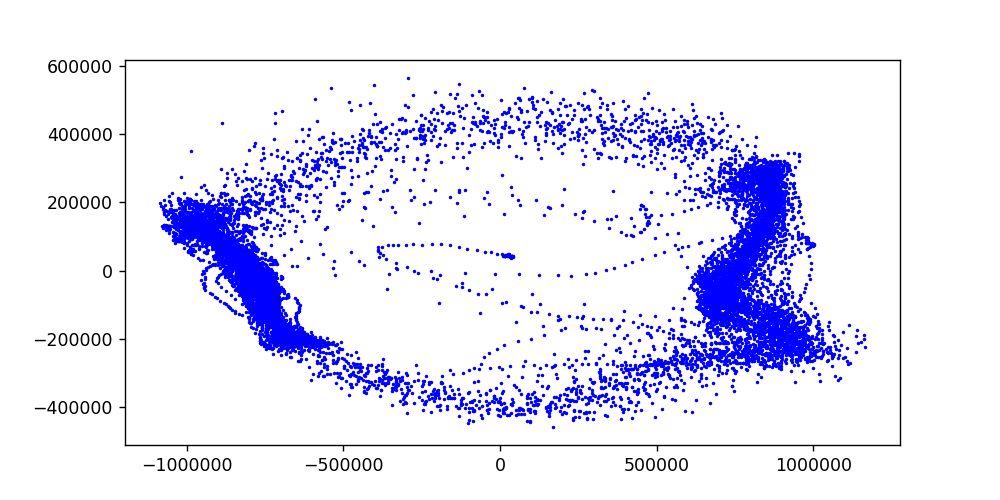

In [58]:

# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
fig, subaxes = plt.subplots(1, 1, figsize=(8,4))

In [59]:
pca = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca.fit_transform(ds_co_poly)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
